<h1>Ovo sve treba importat.</h1>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from scipy.optimize import curve_fit
import scipy.special as special
import scipy.integrate as integrate

<h1>Tek negdje na kraju je to sto ti treba.</h1>

In [2]:
rv = pd.read_excel(r'7_MAGNETSKO_POLJE.xlsx', sheet_name='ravni_vodic')
rv

,I / A,+/-,ρ / m,+/-.1,Bρ / G,+/-.2,B - Bzemlje / G,+/-.3,Bt / G,T / %,...,+/-.4,I / A.1,+/-.5,Bρ / G.1,+/-.6,B - Bzemlje / G.1,+/-.7,Bt / G.1,T / %.1,Bzemlje =0.21 +/- 0.01 G
0,5,0.05,0.001,0.0005,1.92,0.01,1.71,0.01,10.000000,19.2,...,0.0005,2.0,0.01,0.48,0.01,0.27,0.01,1.333333,36.0000,y os
1,5,0.05,0.005,0.0005,0.64,0.01,0.43,0.01,2.000000,32.0,...,0.0005,4.0,0.01,0.82,0.01,0.61,0.01,2.666667,30.7500,NaN
2,5,0.05,0.010,0.0005,0.33,0.01,0.12,0.01,1.000000,33.0,...,0.0005,6.0,0.01,1.11,0.01,0.90,0.01,4.000000,27.7500,NaN
3,5,0.05,0.015,0.0005,0.25,0.01,0.04,0.01,0.666667,37.5,...,0.0005,8.0,0.01,1.39,0.01,1.18,0.01,5.333333,26.0625,NaN
4,5,0.05,0.020,0.0005,0.22,0.01,0.01,0.01,0.500000,44.0,...,0.0005,10.0,0.01,1.69,0.01,1.48,0.01,6.666667,25.3500,NaN
5,5,0.05,0.025,0.0005,0.19,0.01,-0.02,0.01,0.400000,47.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5,0.05,0.030,0.0005,0.20,0.01,-0.01,0.01,0.333333,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5,0.05,0.035,0.0005,0.19,0.01,-0.02,0.01,0.285714,66.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
x = list(rv['ρ / m'])
y = list(rv['B - Bzemlje / G'])
greske = list(rv['+/-.3'])
y2 = list(rv['Bt / G'])

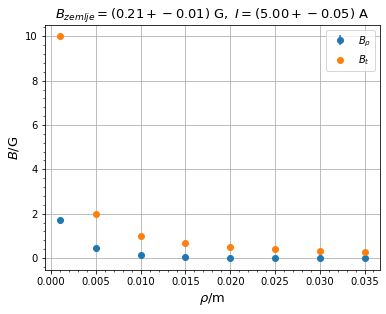

In [4]:
fig1, ax = plt.subplots(figsize=(6,4.5))
ax.set_title(r'$ B_{zemlje} \mathrm{ = (0.21 +- 0.01) \ G,} \ $'
             r'$ I \mathrm{ = (5.00 +- 0.05) \ A}$', fontsize = 13)
ax.set_xlabel(r'$ \rho \mathrm{/ m} $', fontsize = 13)
ax.set_ylabel(r'$ B \mathrm{/ G} $', fontsize = 13)
ax.errorbar(x, y, yerr = greske, fmt='o', label = r'$ B_{\rho} $')
ax.errorbar(x, y2, fmt='o', label = r'$ B_{t} $')
ax.legend()
ax.xaxis.set_minor_locator(MultipleLocator(0.001))
ax.yaxis.set_minor_locator(MultipleLocator(0.4))
ax.grid()

In [5]:
x = list(rv['I / A.1'])
y = list(rv['B - Bzemlje / G.1'])
greske = list(rv['+/-.7'])
y2 = list(rv['Bt / G.1'])

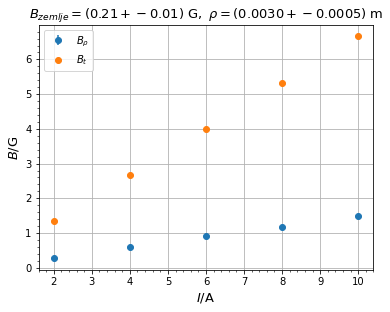

In [6]:
fig2, ex = plt.subplots(figsize=(6,4.5))
ex.set_title(r'$ B_{zemlje} \mathrm{ = (0.21 +- 0.01) \ G,} \ $'
             r'$\rho \mathrm{ = (0.0030 +- 0.0005) \ m}$', fontsize = 13)
ex.set_xlabel(r'$ I \mathrm{/ A} $', fontsize = 13)
ex.set_ylabel(r'$ B \mathrm{/ G} $', fontsize = 13)
ex.errorbar(x, y, yerr = greske, fmt='o', label = r'$ B_{\rho} $')
ex.errorbar(x, y2, fmt='o', label = r'$ B_{t} $')
ex.legend()
ex.xaxis.set_minor_locator(MultipleLocator(0.2))
ex.yaxis.set_minor_locator(MultipleLocator(0.2))
ex.grid()

In [7]:
ro = pd.read_excel(r'7_MAGNETSKO_POLJE.xlsx', sheet_name='Ro_je_0')
ro

,I / A,+/-,z / m,+/-.1,Bz / G,+/-.2,B - Bzemlje / G,+/-.3,Bt / G,T / %,...,+/-.4,z / m.1,+/-.5,Bz / G.1,+/-.6,B - Bzemlje / G.1,+/-.7,Bt / G.1,T / %.1,y0 = 0.18
0,6,0.05,0.000,0.00005,15.36,0.25,15.18,0.01,15.715975,96.589618,...,0.05,0.000,0.00005,20.59,0.25,20.41,0.01,20.954633,97.400894,NaN
1,6,0.05,0.020,0.00005,17.42,0.25,17.24,0.01,17.803977,96.832297,...,0.05,0.020,0.00005,23.44,0.25,23.26,0.01,23.738636,97.983726,NaN
2,6,0.05,0.040,0.00005,19.32,0.25,19.14,0.01,19.726142,97.028604,...,0.05,0.040,0.00005,26.14,0.25,25.96,0.01,26.301522,98.701511,NaN
3,6,0.05,0.060,0.00005,21.29,0.25,21.11,0.01,21.380642,98.734173,...,0.05,0.060,0.00005,28.45,0.25,28.27,0.01,28.507523,99.166807,NaN
4,6,0.05,0.080,0.00005,22.66,0.25,22.48,0.01,22.704276,99.012187,...,0.05,0.080,0.00005,30.19,0.25,30.01,0.01,30.272368,99.133310,NaN
5,6,0.05,0.100,0.00005,23.59,0.25,23.41,0.01,23.669242,98.904729,...,0.05,0.100,0.00005,31.53,0.25,31.35,0.01,31.558990,99.337781,NaN
6,6,0.05,0.120,0.00005,24.30,0.25,24.12,0.01,24.270373,99.380424,...,0.05,0.120,0.00005,32.57,0.25,32.39,0.01,32.360498,99.908833,NaN
7,6,0.05,0.140,0.00005,25.01,0.25,24.83,0.01,24.511427,98.700308,...,0.05,0.140,0.00005,32.02,0.25,31.84,0.01,32.681903,97.423949,NaN
8,6,0.05,0.160,0.00005,24.76,0.25,24.58,0.01,24.395465,99.243567,...,0.05,0.160,0.00005,32.92,0.25,32.74,0.01,32.527286,99.346045,NaN
9,6,0.05,0.180,0.00005,24.32,0.25,24.14,0.01,23.920901,99.084071,...,0.05,0.180,0.00005,32.51,0.25,32.33,0.01,31.894535,98.634673,NaN


In [8]:
x = list(ro['z / m'])
y = list(ro['Bz / G'])
greske = list(ro['+/-.3'])
y2 = list(ro['Bt / G'])

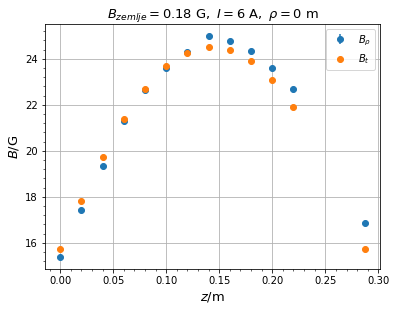

In [9]:
fig3, ix = plt.subplots(figsize=(6,4.5))
ix.set_title(r'$ B_{zemlje} \mathrm{ = 0.18 \ G,} \ $'
             r'$ I \mathrm{ = 6 \ A,} \ $'
             r'$ \rho \mathrm{ = 0 \ m}$', fontsize = 13)
ix.set_xlabel(r'$ z \mathrm{/ m} $', fontsize = 13)
ix.set_ylabel(r'$ B \mathrm{/ G} $', fontsize = 13)
ix.errorbar(x, y, yerr = greske, fmt='o', label = r'$ B_{\rho} $')
ix.errorbar(x, y2, fmt='o', label = r'$ B_{t} $')
ix.legend()
ix.xaxis.set_minor_locator(MultipleLocator(0.01))
ix.yaxis.set_minor_locator(MultipleLocator(0.4))
ix.grid()

In [10]:
x = list(ro['z / m.1'])
y = list(ro['B - Bzemlje / G.1'])
greske = list(ro['+/-.6'])

y2 = list(ro['Bt / G.1'])

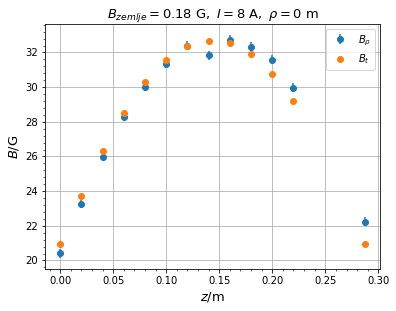

In [11]:
fig4, ux = plt.subplots(figsize=(6,4.5))
ux.set_title(r'$ B_{zemlje} \mathrm{ = 0.18 \ G,} \ I $'
             r'$ \mathrm{ = 8 \ A,} \ $'
             r'$ \rho \mathrm{ = 0 \ m}$', fontsize = 13)
ux.set_xlabel(r'$ z \mathrm{/ m} $', fontsize = 13)
ux.set_ylabel(r'$ B \mathrm{/ G} $', fontsize = 13)
ux.errorbar(x, y, yerr = greske, fmt='o', label = r'$ B_{\rho} $')
ux.errorbar(x, y2, fmt='o', label = r'$ B_{t} $')
ux.legend()
ux.xaxis.set_minor_locator(MultipleLocator(0.01))
ux.yaxis.set_minor_locator(MultipleLocator(0.4))
ux.grid()

In [12]:
ii = pd.read_excel(r'7_MAGNETSKO_POLJE.xlsx', sheet_name='Sheet4')
ii

,ro / m,+/-,z / m,+/-.1,I / A,Bz / G,+/-.2,B - Bzemlje / G,+/-.3,Bt / G,T / %,Unnamed: 11,"N = 135 , L = 287 mm , a = 150 mm"
0,0,0.0005,0.14,0.0005,1,3.29,0.25,3.11,0.01,4.085238,80.533867,NaN,NaN
1,0,0.0005,0.14,0.0005,2,7.78,0.25,7.60,0.01,8.170476,95.220895,NaN,NaN
2,0,0.0005,0.14,0.0005,3,12.02,0.25,11.84,0.01,12.255713,98.076706,NaN,NaN
3,0,0.0005,0.14,0.0005,4,15.97,0.25,15.79,0.01,16.340951,97.729929,NaN,NaN
4,0,0.0005,0.14,0.0005,5,20.31,0.25,20.13,0.01,20.426189,99.431176,NaN,NaN
5,0,0.0005,0.14,0.0005,6,24.20,0.25,24.02,0.01,24.511427,98.729462,NaN,NaN
6,0,0.0005,0.14,0.0005,7,28.49,0.25,28.31,0.01,28.596665,99.627003,NaN,NaN
7,0,0.0005,0.14,0.0005,8,32.62,0.25,32.44,0.01,32.681903,99.810591,NaN,NaN
8,0,0.0005,0.14,0.0005,10,40.51,0.25,40.33,0.01,40.852378,99.161914,NaN,NaN
9,0,0.0005,0.14,0.0005,12,48.77,0.25,48.59,0.01,49.022854,99.484212,NaN,NaN


In [13]:
x = list(ii['I / A'])
y = list(ii['B - Bzemlje / G'])
greske = list(ii['+/-.3'])
y2 = list(ii['Bt / G'])

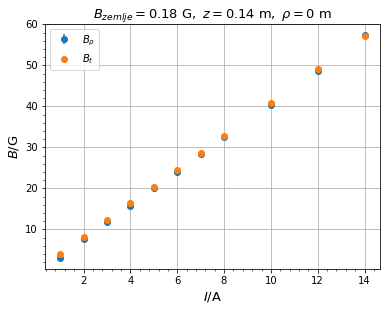

In [14]:
fig5, ox = plt.subplots(figsize=(6,4.5))
ox.set_title(r'$ B_{zemlje} \mathrm{ = 0.18 \ G,} \ $'
             r'$ z \mathrm{ = 0.14 \ m,} \ $'
             r'$ \rho \mathrm{ = 0 \ m}$', fontsize = 13)
ox.set_xlabel(r'$ I \mathrm{/ A} $', fontsize = 13)
ox.set_ylabel(r'$ B \mathrm{/ G} $', fontsize = 13)
ox.errorbar(x, y, yerr = greske, fmt='o', label = r'$ B_{\rho} $')
ox.errorbar(x, y2, fmt='o', label = r'$ B_{t} $')
ox.legend()
ox.xaxis.set_minor_locator(MultipleLocator(0.4))
ox.yaxis.set_minor_locator(MultipleLocator(2))
ox.grid()

<h1>Od tu nadalje je taj dio sa integralom i tako.</h1>

In [15]:
ijea = pd.read_excel(r'7_MAGNETSKO_POLJE.xlsx', sheet_name='i_je_8_a') # učitaš excel sheet
ijea  #### sve sto trebas je svoje podatke tu učitat i dolje promjenit naslove stupaca

,z / m,ro / m,+/-,Bro / G,+/-.1,B - Bzemlje / G,+/-.2,Bt / G,T / %
0,0.07,0.00,0.0005,0.00,0.02,-0.03,0.01,0.000000,0.000000
1,0.07,0.01,0.0005,0.23,0.02,0.20,0.01,0.441845,45.264779
2,0.07,0.02,0.0005,0.72,0.02,0.69,0.01,0.885267,77.942609
3,0.07,0.03,0.0005,1.13,0.02,1.10,0.01,1.331642,82.604807
4,0.07,0.04,0.0005,1.61,0.02,1.58,0.01,1.781910,88.668896
5,0.07,0.05,0.0005,2.10,0.02,2.07,0.01,2.236283,92.564314
6,0.07,0.06,0.0005,2.61,0.02,2.58,0.01,2.693846,95.773864
7,0.07,0.07,0.0005,3.11,0.02,3.08,0.01,3.152022,97.715062
8,0.07,0.08,0.0005,3.54,0.02,3.51,0.01,3.605867,97.341374
9,0.07,0.09,0.0005,3.96,0.02,3.93,0.01,4.047195,97.104287


In [16]:
def func(k, ro):    # definirana je funkcija ispod integrala
    return (np.exp(- k * np.abs(0.07 - 0.287)) - np.exp(- k * 0.07)) * special.j1(k*ro) * special.j1(k * 0.15)

In [17]:
x = list(ijea['ro / m'])  # stupci u exelu su spremljeni kao liste u varijable
y = list(ijea['B - Bzemlje / G']) #### znaci tu trebas napisati svoje nazive stupaca koji ti trebaju
greske = list(ijea['+/-'])
ts = np.linspace(0.0, 0.14, 100)   # definirana lista koja ce sluziti za iscrtavanje krivulje
b = (4*np.pi*10**(-3)*8*135*0.15)/(2*0.287)  # ona konstanta s kojom se mnozi integral
# integriranje funkcija
Bq = np.array([integrate.quad(func, 0, np.inf, args=(ro)) for ro in ts]) # ovdje se računaju vrijednosti za krivulju
Bq = -Bq*b
Bq2 = np.array([integrate.quad(func, 0, np.inf, args=(j)) for j in x]) # ovdje racunam tocke za usporedbu sa svojim mjerenjima
Bq2 = -Bq2*b
Bq2[:, 0]

array([-0.        ,  0.44184464,  0.88526675,  1.33164164,  1.78191008,
        2.23628297,  2.69384559,  3.15202175,  3.60586652,  4.04719514,
        4.46366061,  5.14886768,  5.48566333])

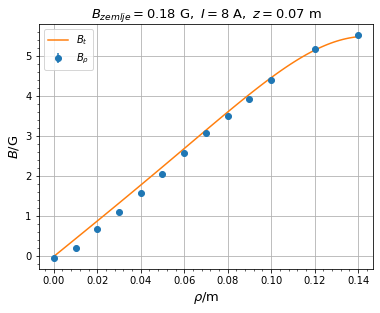

In [18]:
fig6, xx = plt.subplots(figsize=(6,4.5))  ### cratnje grafa
xx.set_title(r'$ B_{zemlje} \mathrm{ = 0.18 \ G,} \ $'
             r'$ I \mathrm{ = 8 \ A,} \ $'
             r'$ z \mathrm{ = 0.07 \ m}$', fontsize = 13)
xx.set_xlabel(r'$ \rho \mathrm{/ m} $', fontsize = 13)
xx.set_ylabel(r'$ B \mathrm{/ G} $', fontsize = 13)
xx.errorbar(x, y, yerr = greske, fmt='o', label = r'$ B_{\rho} $')
xx.plot(ts, Bq[:, 0], label = r'$ B_{t} $')
xx.legend()
xx.xaxis.set_minor_locator(MultipleLocator(0.004))
xx.yaxis.set_minor_locator(MultipleLocator(0.2))
xx.grid()

In [19]:
fig1.savefig('ravni1.png')
fig2.savefig('ravni2.png')
fig3.savefig('prvi.png')
fig4.savefig('drugi.png')
fig5.savefig('treci.png')
fig6.savefig('cetvrti.png') ### ovu sliku treba spremit